# Insurance Claim prediction(Mini project-1)

# Life cycle of Machine learning Project


1)Understanding the Problem Statement

2)Data Collection

3)Exploratory data analysis

4)Data Cleaning

5)Data Pre-Processing

6)Model Training

7)Choose best model

# 1)PROBLEM STATEMENT.

   
    This dataset contains information on the insurance claim. each observation is different policyholder with various features like the age of the person, the gender of the policyholder,body mass index, providing an understanding of the body, number of children of the policyholder, smoking state of the policyholder and individual medical costs billed by health insurance.

# 2)DATA COLLECTING

*Data was provided by guide

*It consists of a 8 columns & 1338 rows

# 2.1)importing data and libraries.

In [1]:
#importing packages

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### importing CSV file in DataFrame

In [4]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


### shape of data

In [5]:

df.shape

(1338, 8)

### info of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


### describe

In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


### checking null values

In [8]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
#there are no null values

#  3)EDA

In [9]:
import pandas_profiling as pdp   # one of the paackage for EXPLORING DATA 

report=pdp.ProfileReport(df,title="report")
report

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_11820\1395939689.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### FEATURE INFO

* **age:** age of policyholder
* **sex:** male(1)/female(0)
* **bmi:** body mass index(kg / m2)
* **children:** number of children/dependents of policyholder
* **smoker:** smoking state nonsmoker(0)/smoker(1)
* **region:** residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)
* **charges:** medical cost
* **insuranceclaim:** yes(1)/no(0)


### Variable type

* **Numeric:** 4[Age,Bmi,Children,Charges]
* **Categorical:** 4[Sex,Smoker,Region,Insurance_Claim]

### unique values in each features

In [10]:
df.nunique()

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

### Few insights from above

In [11]:
# minimun age is 18, means all the data is about adults
# there are people having min children zero and max children five
# 42.9 % of people dont have kids

#79.5% people as non smoker,20.5 % of people are smoker
#people who smoke have more charges

# min charge is 1121 rs , max charge is 63770rs
#95% of the people takes  charges till 41181.828 rs

#58.5% people cliams insurance  &  41.5% people dont claim

#theres Linear relation between "Age" and "Charges", charges increases generally for older people
# "BMI" idel range is (19-25)
# looking at "BMI" vs "Charges" correlation plot, we can observe,people having bmi above 25 have more "charges"

#people who smokes have more charges than people who dont.



<AxesSubplot:xlabel='age', ylabel='charges'>

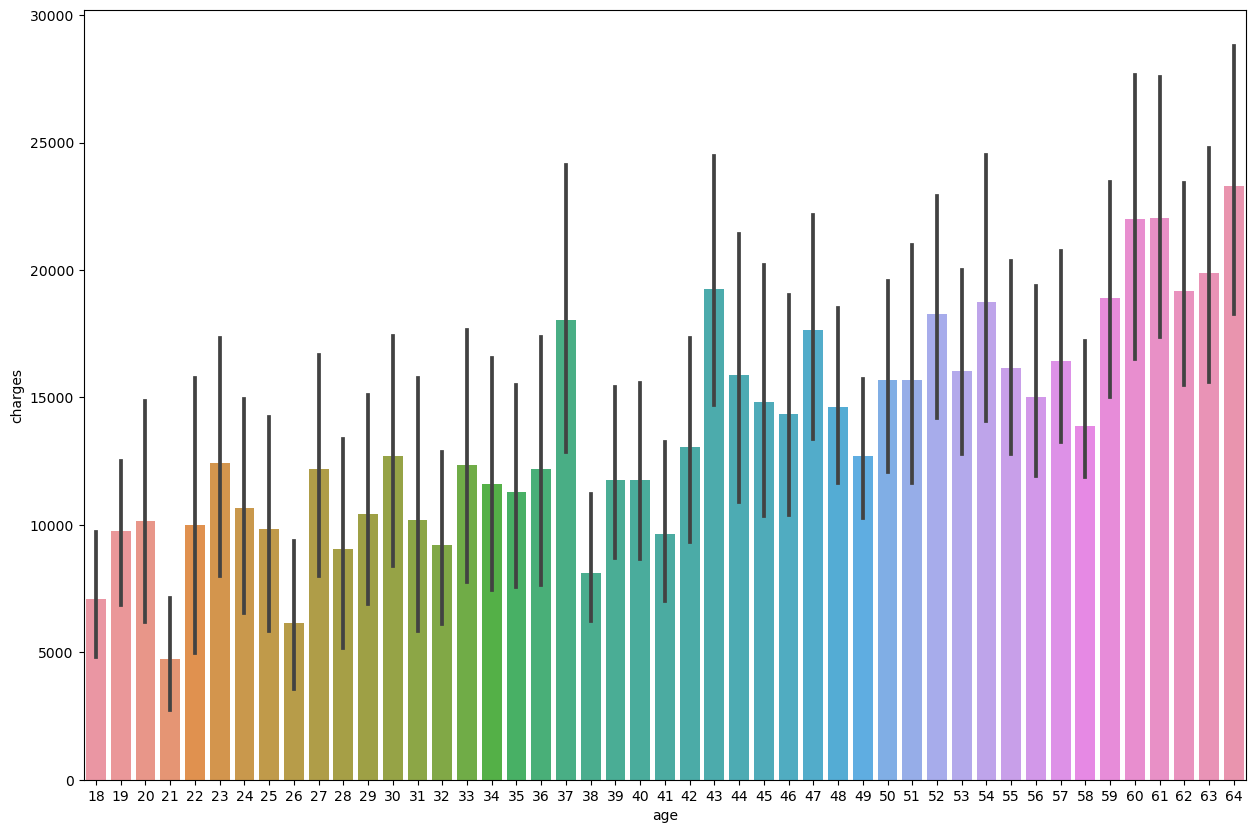

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x="age",y="charges") 

* ** we can observe that as "AGE"  is increasing charges are also going up**

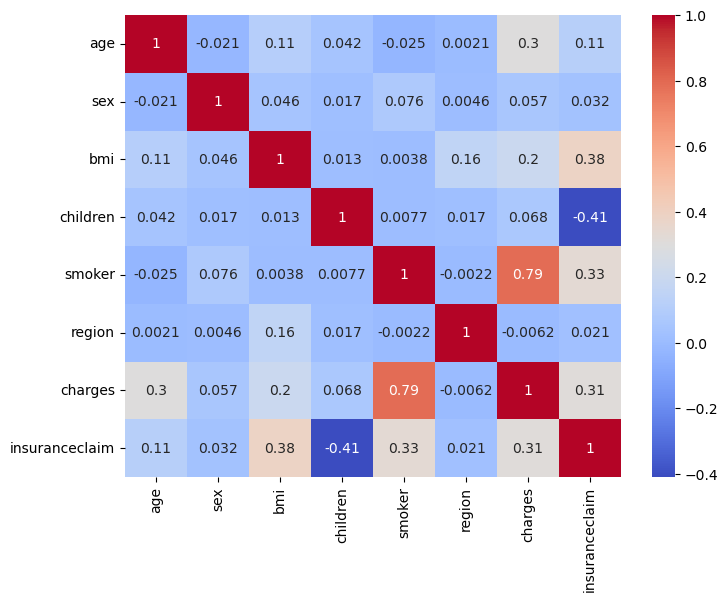

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.show()

*  **people who smokes have high charges corelation,means people who smoke have high charges **

*  ** "clindren and charges has taken negative correlation"**

<Figure size 640x480 with 0 Axes>

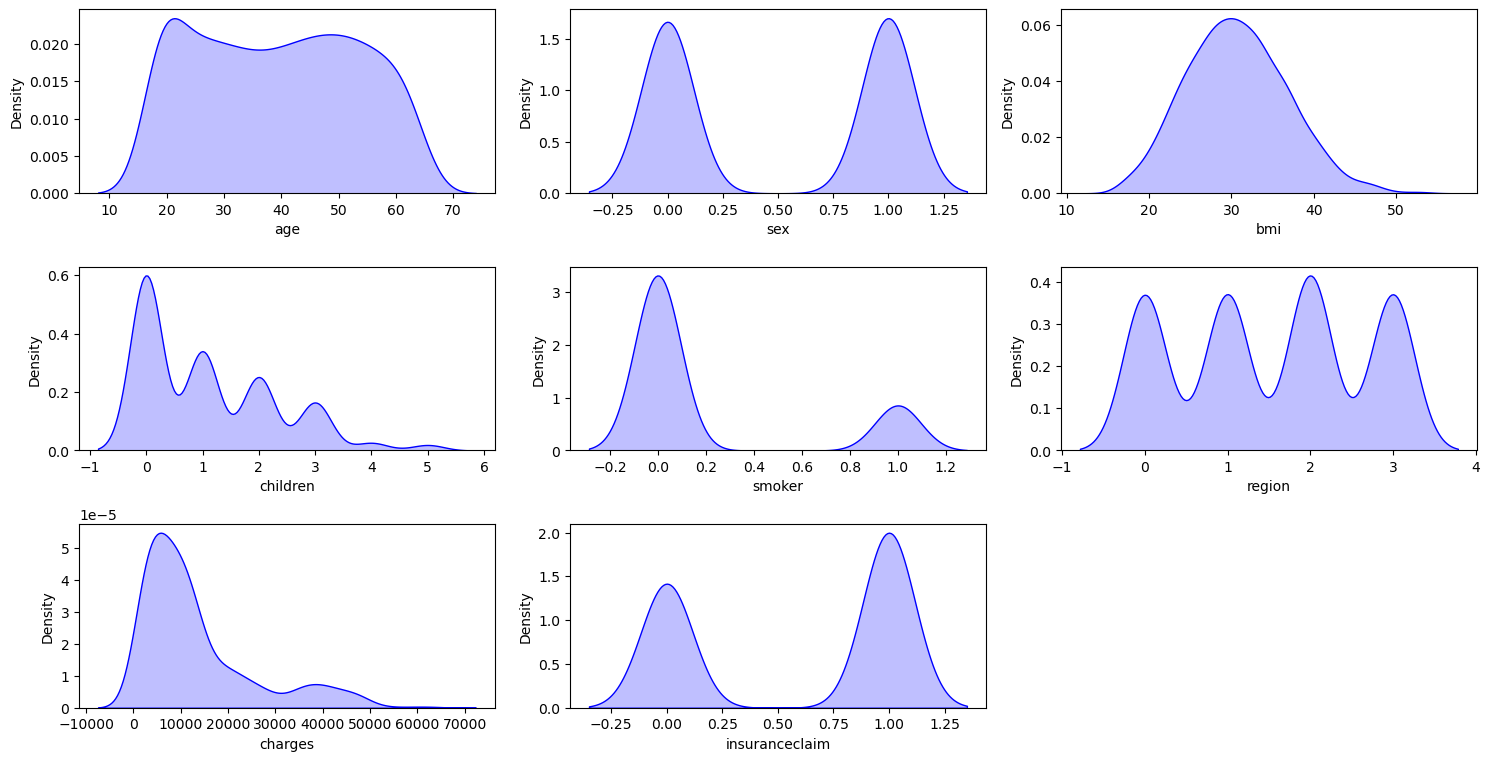

In [16]:
#checking data distribution

plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.figure(figsize=(15,15))
for i in range(0,len(df.columns)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=df.iloc[:,i],shade=True,color="b")
    plt.xlabel(df.columns[i])
    plt.tight_layout()

** insights**

* There are outliar in "Charges","Chindren".
* Charges are Right skewed.

age


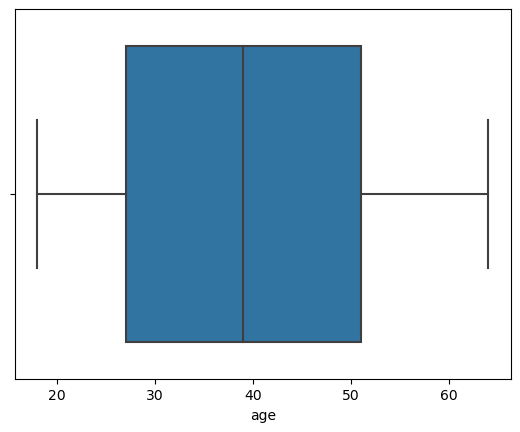

sex


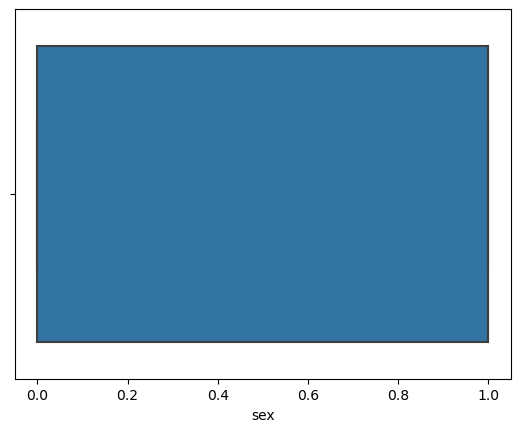

bmi


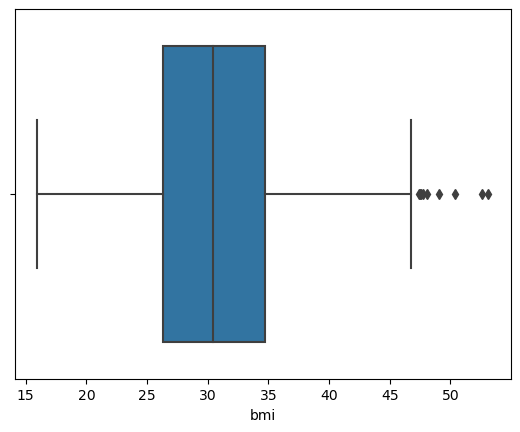

children


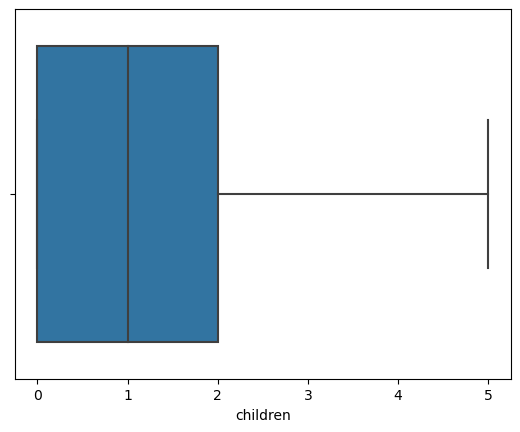

smoker


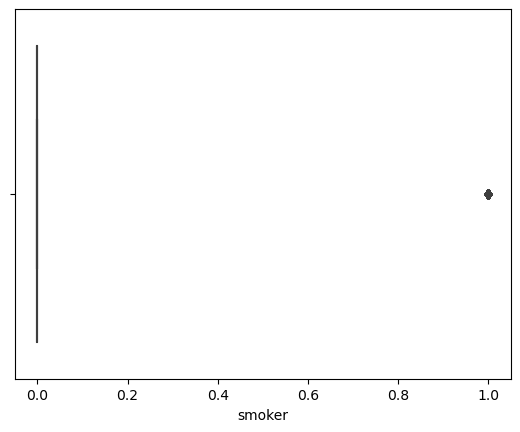

region


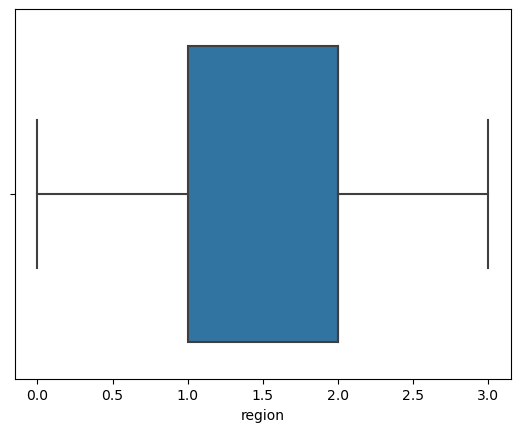

charges


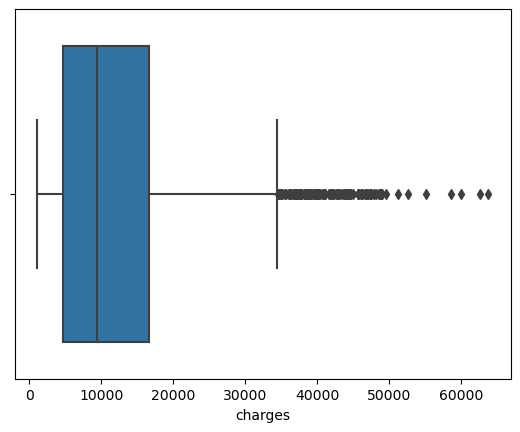

insuranceclaim


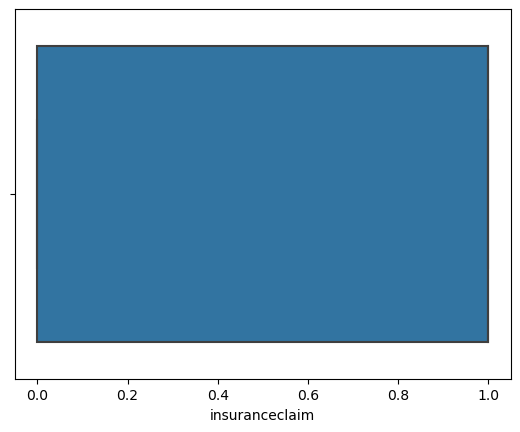

In [21]:
#checking outliars now

for i in df:
    
    print(i)
#    plt.title(i+"Boxplot")
    sns.boxplot(x=df[i])
    plt.show()

**Report**

* **"Bmi" has outliars this can be real data obsese people has bmi above 45**

* **"Chaarges" has lots of ouliars means this is real data**


# Lets see diffent scatter plot in relation with "Charges"

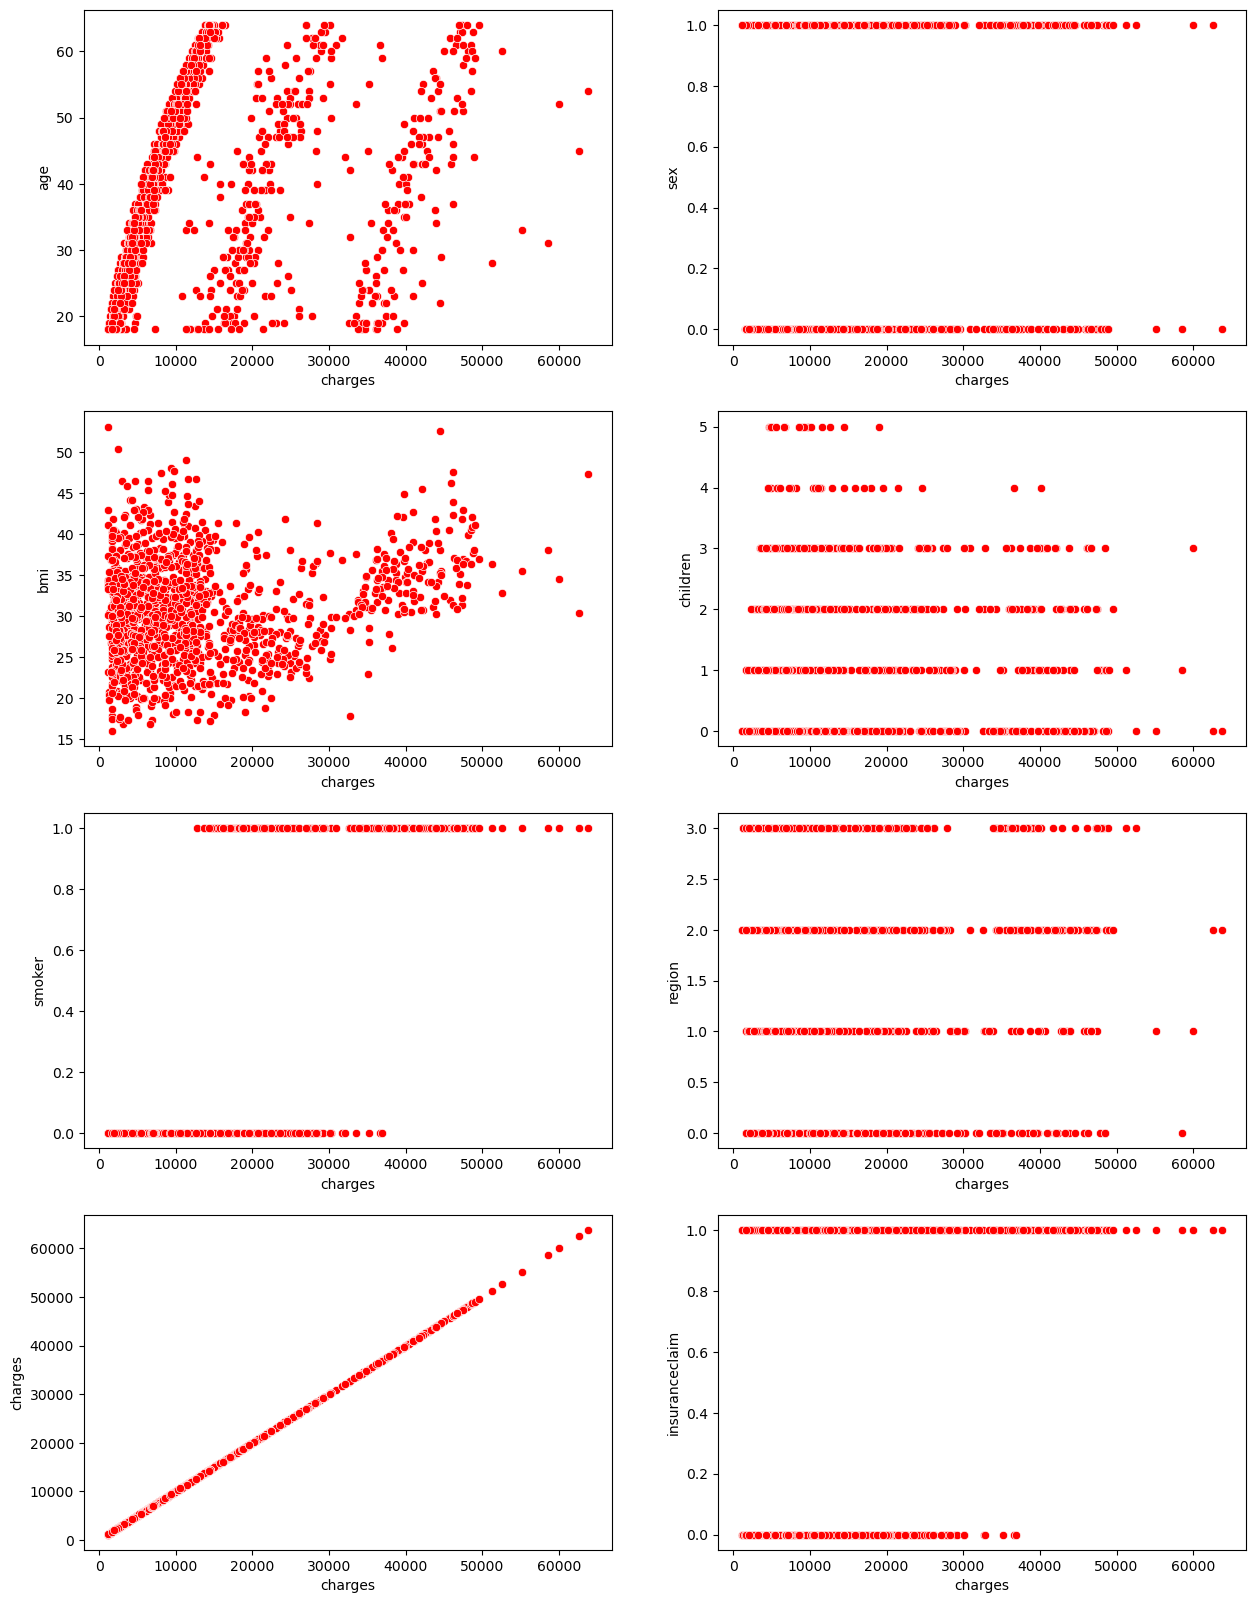

In [22]:
plt.figure(figsize=(15, 20))
for i in range(0,len(df.columns)):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data=df,x="charges",y=df.iloc[:,i],color="r")
    plt.xlabel("charges")

**Report**

* **people mostly claim insurance money who has charges above 30,000**
* **all 4 region data are proper distributes so its not much related to charges**

* **people who smokes their charges starts from aprox 15,000 which is high**

* **insurance company should take more premium from people who smoke**
* **people who dont smoke their charges max-out at around 38,000**
* ****

# 4) Data Cleaning

In [23]:
# checking null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

### checking duplicates 

In [24]:
#check duplicates
df[df.duplicated(keep="last")]
#581 & 195 rows no are same we need to drop one

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
195,19,1,30.59,0,0,1,1639.5631,1


In [26]:
#dropping 1 duplicat row

In [25]:
df1=df.drop_duplicates()
df1

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [ ]:
#data is mostly clean now (not removed outliar coz HIGH BMI & HIGH CHARGES are real data and momdel needs it)

<AxesSubplot:xlabel='age', ylabel='insuranceclaim'>

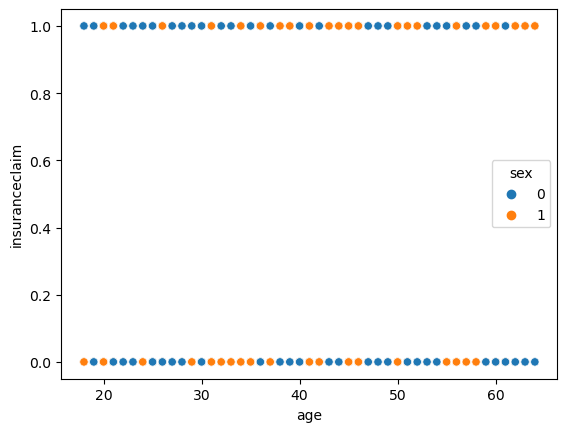

In [37]:
sns.scatterplot(x="age",y="insuranceclaim",data=df1,hue="sex")

**Report**

* **"insuranceclaim" above 60 AGE was claid by males only**


<AxesSubplot:xlabel='children', ylabel='age'>

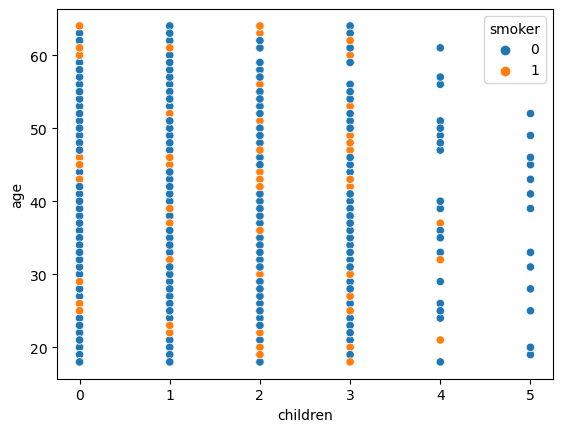

In [51]:
sns.scatterplot(x="children",y="age",data=df1,hue="smoker")

**Report**

* **Above graph looks simple but it has crutial info**
* **People with children generally dont smoke so their charges gonna be less**
* **more the children less it tends to smoke**
* **so its safe to give insurance to people with children ,which is better for business**

<AxesSubplot:xlabel='charges', ylabel='age'>

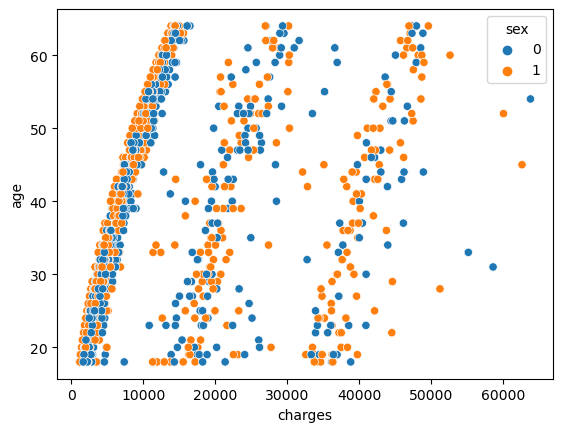

In [40]:
sns.scatterplot(x="charges",y="age",data=df1,hue="sex")

**Report**

* **55-60% people who takes charges above 40K are males**

<AxesSubplot:xlabel='age', ylabel='smoker'>

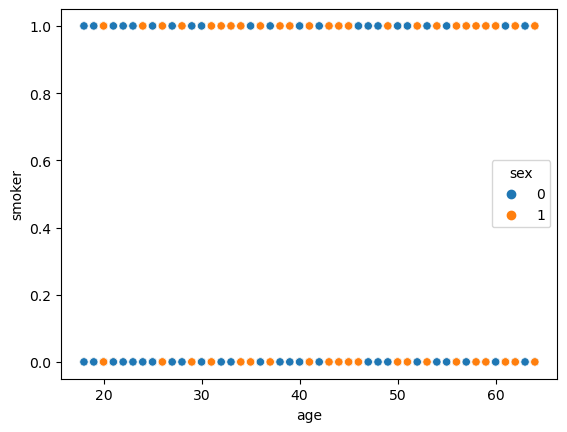

In [45]:
sns.scatterplot(x="age",y="smoker",data=df1,hue="sex")

In [ ]:
#theres no relation between age and smoker in between both the sex

Text(0.5, 1.0, 'AGE vs CHARGES')

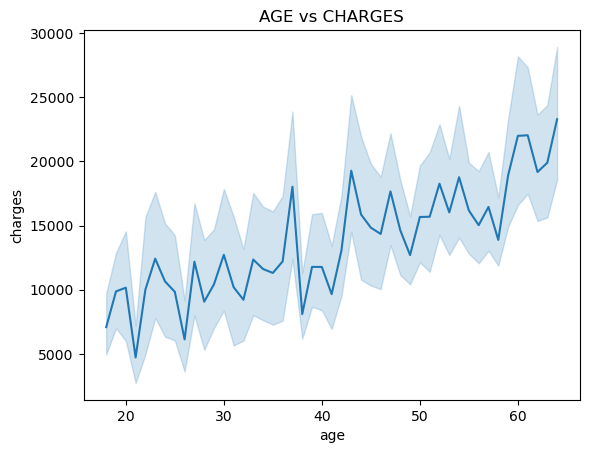

In [54]:
sns.lineplot(x='age',y="charges",data=df1)
plt.title("AGE vs CHARGES")

Text(0.5, 1.0, 'Sex vs CHARGES')

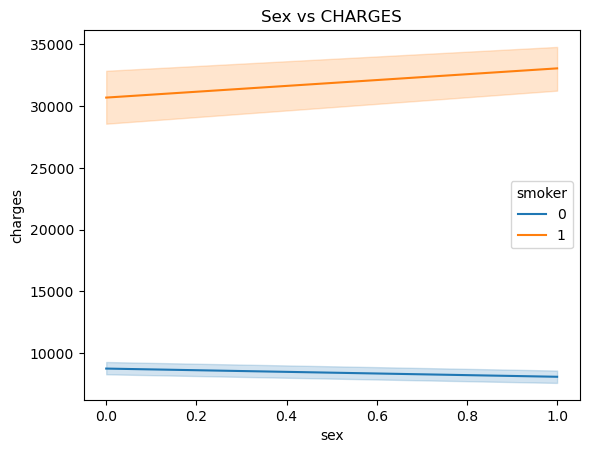

In [57]:
sns.lineplot(x='sex',y="charges",data=df1,hue="smoker")
plt.title("Sex vs CHARGES")

**Report**

* **people with no smoking has less charges ir-respective of sex**
* **people who smokes has more charges,but female tends to have less charges than males overall**

# 6)MODEL BUILDING


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Dividing features and labels

In [59]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

### dividing train and test data

In [60]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)
#keeping training size 70%
#testing size 30%

In [61]:
print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)
print("y_train_shape",y_train.shape)
print("y_test_shape",y_test.shape)

X_train_shape (936, 7)
X_test_shape (402, 7)
y_train_shape (936,)
y_test_shape (402,)


# Random Forest Classifier

In [62]:
#initializing model
rfc=RandomForestClassifier(random_state=23)

#fitting data 
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=23)

### prediction

In [63]:

y_pred_rfc=rfc.predict(X_test)
y_pred_rfc

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

### checking model score on TEST data set

In [65]:
print(rfc.score(X_test,y_test))

0.9228855721393034


### checking model score on TRAINING data set

In [66]:
print(rfc.score(X_train,y_train))

1.0


### checking model score on PREDICTED data 

In [67]:
print(rfc.score(X_test,y_pred_rfc))

1.0


In [68]:
#checking score with metrics
from sklearn.metrics import accuracy_score
score_rfc=accuracy_score(y_test,y_pred_rfc)
print("comparision score between actual and predicted labels:",score_rfc)

comparision score between actual and predicted labels: 0.9228855721393034


In [69]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_rfc)
confusion_matrix

array([[170,  13],
       [ 18, 201]], dtype=int64)

### doing manula calulation for checking accuracy score

In [70]:
cfm=(170+201)/(170+13+18+201)
print("manual confusion matrix score checking:",cfm)

manual confusion matrix score checking: 0.9228855721393034


# Using Hyper parameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV


parameters={
             "max_depth":[1,3,5,9,10],
            "min_samples_leaf":[1,2,4,5,7,8,9],
            "min_samples_split":[5,6,8,10],
            "max_features":["auto","sqrt",None],
            "n_estimators":[100,300,600,700]
           }

In [73]:
rfc_HPT = GridSearchCV(estimator=rfc,param_grid=parameters,
                          cv=4,verbose=2,return_train_score=True)

In [74]:
rfc_HPT.fit(X_train,y_train)

Fitting 4 folds for each of 1680 candidates, totalling 6720 fits
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; to

[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_sam

[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_sam

[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_sam

[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_sam

[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_sam

[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=auto, min_sam

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_sam

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_sa

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   1.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, m

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=sqrt,

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   1.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   1.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   1.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, 

[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   1.3s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=1, max_features=sqrt, min_s

[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=None, min_sam

[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   1.3s
[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   1.4s
[CV] END max_depth=1, max_features=None, min_sam

[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.4s
[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_sam

[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_sam

[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   1.2s
[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   1.4s
[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   1.3s
[CV] END max_depth=1, max_features=None, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   1.4s
[CV] END max_depth=1, max_features=None, min_sam

[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.4s
[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.3s
[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.2s
[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   1.3s
[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_sam

[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END max_depth=1, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   1.0s
[CV] END max_depth=1, max_features=None, min_sam

[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.8s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.7s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   1.7s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   2.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   1.6s
[CV] END max_depth=3, max_features=auto, min_sam

[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   1.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.3s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.3s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   1.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_

[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto,

[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.8s
[CV] END max_depth=3, max_features=auto,

[CV] END max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, m

[CV] END max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=auto, min_sa

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_sam

[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   1.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.9s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.9s
[CV] END max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_sa

[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=700; total time=   0.9s
[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=3, max_features=None, m

[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None,

[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=3, max_features=None,

[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END max_depth=3, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=3, max_features=None, min_

[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=3, max_features=None, min_samples_leaf=9, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=3, max_features=None, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, mi

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=700; total time=118.7min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sa

[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=None, mi

[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto,

[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto,

[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_

[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_sam

[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_sam

[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_sam

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_sam

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_sam

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_sam

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_sam

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_sam

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, mi

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=9, max_features=sqrt,

[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None,

[CV] END max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   0.8s
[CV] END max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_

[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_sam

[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=7, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_sam

[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=8, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_sam

[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   0.6s
[CV] END max_depth=9, max_features=None, min_sam

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=9, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=s

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=600; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=700; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=700; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None

[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features

[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=700; total time=   0.7s
[CV] END max_depth=10, max_features=None, min_samples_leaf=9, min_samples_split=10, n_estimators=700; total time=   0.7s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [1, 3, 5, 9, 10],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4, 5, 7, 8, 9],
                         'min_samples_split': [5, 6, 8, 10],
                         'n_estimators': [100, 300, 600, 700]},
             return_train_score=True, verbose=2)

In [75]:
#best params
rfc_HPT.best_params_

{'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [78]:
print("TESTING SCORE USING HYPER PARAMETER TUNING")
print(rfc_HPT.score(X_test,y_test))

TESTING SCORE USING HYPER PARAMETER TUNING
0.9850746268656716


In [79]:
print("TRAINING SCORE USING HYPER PARAMETER TUNING")
print(rfc_HPT.score(X_train,y_train))

TRAINING SCORE USING HYPER PARAMETER TUNING
0.9967948717948718


### PREDICTING( with hyper parameter tuning)

In [80]:
y_pred_rfc_hpt=rfc_HPT.predict(X_test)

In [81]:
print("comparing actual feature with predicted score, USING HYPER PARAMETER TUNING")
print(rfc_HPT.score(X_test,y_pred_rfc_hpt))

comparing actual and predicted score, USING HYPER PARAMETER TUNING
1.0


In [82]:
score_rfc_HPT=accuracy_score(y_test,y_pred_rfc_hpt)
print("comparing actual and predicted label score:",score_rfc_HPT)

comparing actual and predicted label score: 0.9850746268656716


### now using RANDOM FOREST MODEL WITH HYPER PARAMETER TUNING WE GOT GOOD JUMP IN ACCURACY

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_pred_rfc_hpt,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       179
           1       1.00      0.98      0.99       223

    accuracy                           0.99       402
   macro avg       0.98      0.99      0.98       402
weighted avg       0.99      0.99      0.99       402



In [85]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       188
           1       0.92      0.94      0.93       214

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



In [86]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_rfc_hpt)
confusion_matrix

array([[178,   5],
       [  1, 218]], dtype=int64)

In [88]:
cfm_hpt=(178+218)/(178+5+1+218)#manually doing calulation for acccuracy check
print("manual validating score through confusion matrix:",cfm_hpt)                         # with rf_hpt

manual validating score through confusion matrix: 0.9850746268656716


**Report**
* **using Hyper Parameter Tuning on Random_forest we got better results**
* **and to validate that result we have done manual calculation with confusion matrix**

# 7) Selecting Final model

**I am selecting Random_forest with HyperParameterTuning as my final model**